<a href="https://colab.research.google.com/github/MalinduSilva/ML_Project/blob/main/ml_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving Attribute_DataSet.csv to Attribute_DataSet.csv


In [ ]:
import io
attribute_data=pd.read_csv(io.BytesIO(data_to_load['Attribute_DataSet.csv']))
attribute_data.head()

,Dress_ID,Style,Price,PatternType,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Rating,Recommendation
0,1006032852,Sexy,Low,animal,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,4.6,1
1,1212192089,Casual,Low,animal,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,0.0,0
2,1190380701,vintage,High,print,L,Automn,o-neck,full,natural,polyster,NaN,NaN,0.0,0
3,966005983,Brief,Average,print,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,4.6,1
4,876339541,cute,Low,dot,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,4.5,0


In [ ]:
attribute_data.columns 

Index(['Dress_ID', 'Style', 'Price', 'PatternType', 'Size', 'Season',
       'NeckLine', 'SleeveLength', 'waiseline', 'Material', 'FabricType',
       'Decoration', 'Rating', 'Recommendation'],
      dtype='object')

In [ ]:
attribute_data=attribute_data.set_index('Dress_ID', inplace=False)

**Data Cleaning**

In [ ]:
attribute_data.isnull().sum()

Style               0
Price               2
PatternType       109
Size                0
Season              2
NeckLine            3
SleeveLength        2
waiseline          87
Material          128
FabricType        266
Decoration        236
Rating              0
Recommendation      0
dtype: int64

In [ ]:
attribute_data=attribute_data.drop(['FabricType', 'Decoration'],axis=1)

In [ ]:
attribute_data['Style'].value_counts()

Casual      232
Sexy         69
party        51
cute         45
vintage      25
bohemian     24
Brief        18
work         17
Novelty       8
sexy          7
Flare         2
OL            1
fashion       1
Name: Style, dtype: int64

In [ ]:
attribute_data['Style']=attribute_data['Style'].str.lower()

In [ ]:
attribute_data['Season'].value_counts()

Summer    159
Spring    122
Winter     99
Automn     61
winter     46
Autumn      8
spring      2
summer      1
Name: Season, dtype: int64

In [ ]:
attribute_data['Season']=attribute_data['Season'].str.lower()
attribute_data.loc[(attribute_data.Season  == 'automn'),'Season']= 'autumn'

In [ ]:
attribute_data[attribute_data['Season'].isnull()].index.tolist()

[929797706, 751364623]

In [ ]:
attribute_data.loc[751364623]

Style                  party
Price                Average
PatternType              NaN
Size                       L
Season                   NaN
NeckLine          Sweetheart
SleeveLength       sleevless
waiseline             empire
Material                 NaN
Rating                   4.8
Recommendation             1
Name: 751364623, dtype: object

In [ ]:
attribute_data.loc[929797706]

Style                casual
Price                   Low
PatternType       patchwork
Size                   free
Season                  NaN
NeckLine             o-neck
SleeveLength           full
waiseline           natural
Material             cotton
Rating                    0
Recommendation            0
Name: 929797706, dtype: object

In [ ]:
attribute_data.at[751364623, 'Season']= 'summer'
attribute_data['Season'].fillna(attribute_data['Season'].mode()[0], inplace=True)

In [ ]:
attribute_data['Price'].value_counts()

Average      252
Low          129
low           45
Medium        30
very-high     21
high          15
High           6
Name: Price, dtype: int64

In [ ]:
attribute_data['Price']=attribute_data['Price'].str.lower()
attribute_data.loc[(attribute_data.Price  == 'medium'),'Price']= 'average'
attribute_data['Price'] = attribute_data.groupby(['Season','Style'])['Price'].transform(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
attribute_data['NeckLine'].value_counts()

o-neck             271
v-neck             124
slash-neck          25
boat-neck           19
Sweetheart          14
turndowncollor      13
bowneck             10
peterpan-collor      6
sqare-collor         5
open                 3
Scoop                2
ruffled              1
backless             1
sweetheart           1
mandarin-collor      1
halter               1
Name: NeckLine, dtype: int64

In [ ]:
attribute_data['NeckLine']=attribute_data['NeckLine'].str.lower()
attribute_data.loc[(attribute_data.NeckLine  == 'bowneck'),'NeckLine']= 'bow-neck'
attribute_data.loc[(attribute_data.NeckLine  == 'turndowncollor'),'NeckLine']= 'turndown-collor'
attribute_data.loc[(attribute_data.NeckLine  == 'square-collor'),'NeckLine']= 'square-collor'
attribute_data['NeckLine'] = attribute_data.groupby(['Season','Style'])['NeckLine'].transform(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
attribute_data['SleeveLength'].value_counts()

sleevless         223
full               97
short              96
halfsleeve         35
threequarter       17
thressqatar        10
sleeveless          5
capsleeves          3
sleeevless          3
cap-sleeves         2
Petal               1
half                1
threequater         1
turndowncollor      1
urndowncollor       1
sleveless           1
butterfly           1
Name: SleeveLength, dtype: int64

In [ ]:
attribute_data.loc[(attribute_data.SleeveLength  == 'thressqatar'),'SleeveLength']= 'threequater'
attribute_data.loc[(attribute_data.SleeveLength  == 'sleevless'),'SleeveLength']= 'sleeveless'
attribute_data.loc[(attribute_data.SleeveLength  == 'capsleeves'),'SleeveLength']= 'cap-sleeves'
attribute_data.loc[(attribute_data.SleeveLength  == 'sleevless'),'SleeveLength']= 'sleevless'
attribute_data.loc[(attribute_data.SleeveLength  == 'urndowncollor'),'SleeveLength']= 'turndown'
attribute_data.loc[(attribute_data.SleeveLength  == 'threequater'),'SleeveLength']= 'threequater'
attribute_data.loc[(attribute_data.SleeveLength  == 'turndowncollor'),'SleeveLength']= 'turndown'
attribute_data.loc[(attribute_data.SleeveLength  == 'sleevless'),'SleeveLength']= 'sleevless'
attribute_data.loc[(attribute_data.SleeveLength  == 'halfsleeve'),'SleeveLength']= 'half'
attribute_data['SleeveLength'] = attribute_data['SleeveLength'].fillna(value='other')

In [ ]:
attribute_data['waiseline'].value_counts()

natural     304
empire      104
dropped       4
princess      1
Name: waiseline, dtype: int64

In [ ]:
attribute_data['Material'].value_counts()

cotton           152
polyster          99
silk              26
chiffonfabric     25
mix               12
rayon             10
nylon             10
spandex            5
milksilk           5
cashmere           4
microfiber         3
acrylic            3
lycra              3
linen              3
viscos             2
other              2
shiffon            2
sill               1
wool               1
lace               1
model              1
modal              1
knitting           1
Name: Material, dtype: int64

In [ ]:
attribute_data.loc[(attribute_data.Material  == 'chiffonfabric'),'Material']= 'chiffon'
attribute_data.loc[(attribute_data.Material  == 'shiffon'),'Material']= 'chiffon'
attribute_data.loc[(attribute_data.Material  == 'sill'),'Material']= 'silk'
attribute_data.loc[(attribute_data.Material  == 'model'),'Material']= 'modal'

In [ ]:
def maxType(x):
  if (x.isnull().sum()!=len(x)):
      return x.value_counts().index[0]
  else:
      return 'n'

In [ ]:
attribute_data['Material']= attribute_data.groupby(['Season','Style'])['Material'].transform(lambda x: x.fillna(maxType(x)))
attribute_data.loc[(attribute_data.Material  == 'n'),'Material']= np.NaN
attribute_data['Material'] = attribute_data.groupby(['Season'])['Material'].transform(lambda x: x.fillna(maxType(x)))
attribute_data['waiseline']= attribute_data.groupby(['Season','Style','Material'])['waiseline'].transform(lambda x: x.fillna(maxType(x)))
attribute_data.loc[(attribute_data.Material  == 'n'),'waiseline']= np.NaN
attribute_data['waiseline'] = attribute_data.groupby(['Season'])['waiseline'].transform(lambda x: x.fillna(maxType(x)))


In [ ]:
attribute_data['PatternType'].value_counts()

solid        203
print         71
patchwork     48
animal        21
striped       17
dot           14
geometric      5
leopard        3
plaid          3
floral         2
character      1
none           1
splice         1
leapord        1
Name: PatternType, dtype: int64

In [ ]:
attribute_data.loc[(attribute_data.PatternType  == 'none'),'PatternType']= 'solid'
attribute_data.loc[(attribute_data.PatternType  == 'leapord'),'PatternType']= 'leopard'

In [ ]:
attribute_data['PatternType']= attribute_data.groupby(['Season','Style','Material','waiseline'])['PatternType'].transform(lambda x: x.fillna(maxType(x)))
attribute_data.loc[(attribute_data.PatternType  == 'n'),'PatternType']= np.NaN
attribute_data['PatternType'] = attribute_data.groupby(['Season','Style'])['PatternType'].transform(lambda x: x.fillna(maxType(x)))

In [ ]:
attribute_data['Size'].value_counts()

M        177
free     173
L         96
S         37
XL        15
small      1
s          1
Name: Size, dtype: int64

In [ ]:
attribute_data.loc[(attribute_data.Size  == 's'),'Size']= 'S'
attribute_data.loc[(attribute_data.Size  == 'small'),'Size']= 'S'

**Data Visualizing**




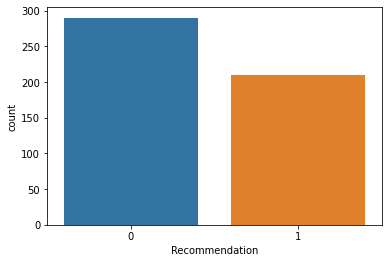

In [ ]:
sns.countplot(x='Recommendation',data=attribute_data)

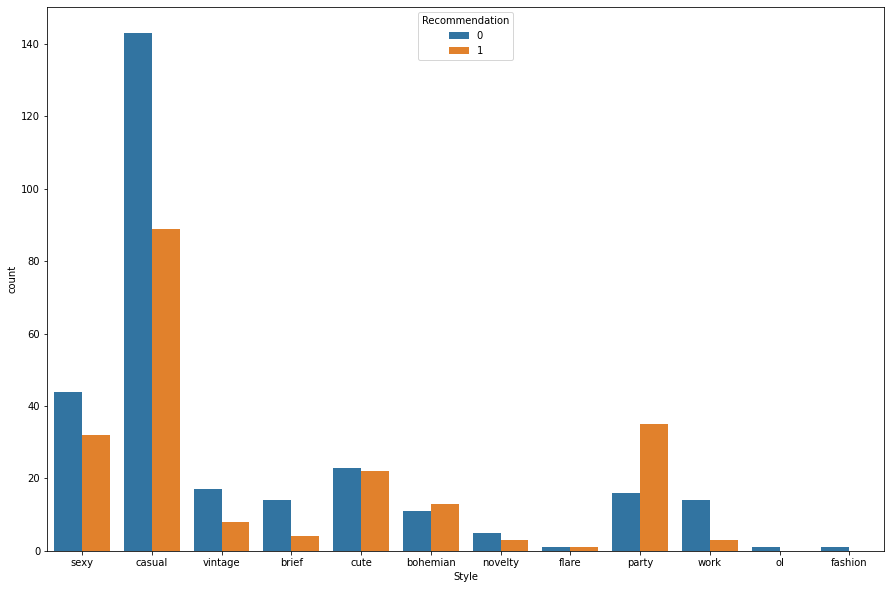

In [ ]:
plt.figure(figsize=(15,10))
counts=sns.countplot(x='Style',data=attribute_data,hue='Recommendation')

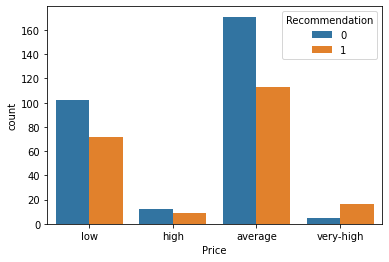

In [ ]:
counts=sns.countplot(x='Price',data=attribute_data,hue='Recommendation')

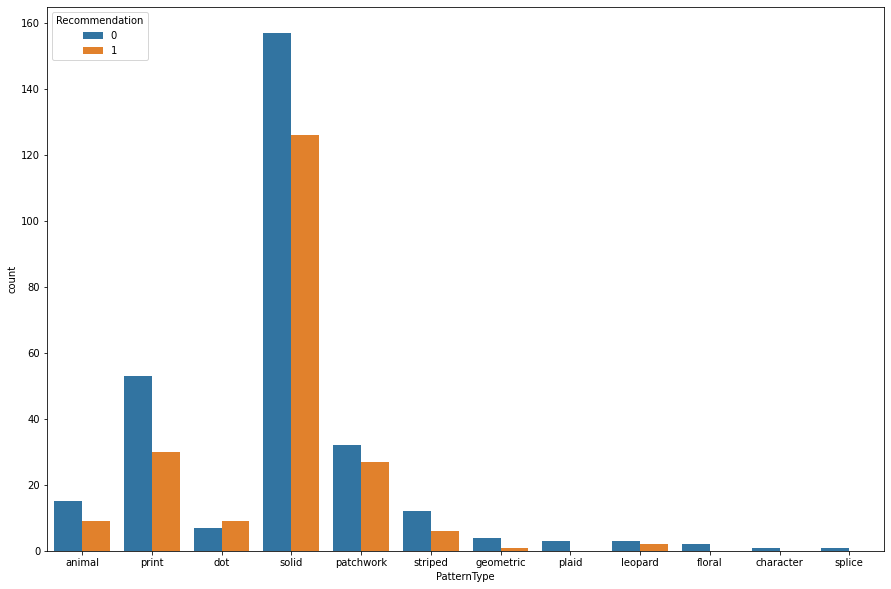

In [ ]:
plt.figure(figsize=(15,10))
counts=sns.countplot(x='PatternType',data=attribute_data,hue='Recommendation')

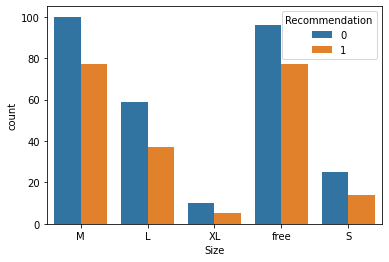

In [ ]:
counts=sns.countplot(x='Size',data=attribute_data,hue='Recommendation')

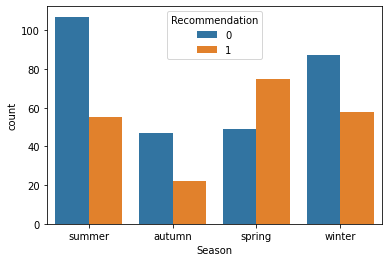

In [ ]:
counts=sns.countplot(x='Season',data=attribute_data,hue='Recommendation')

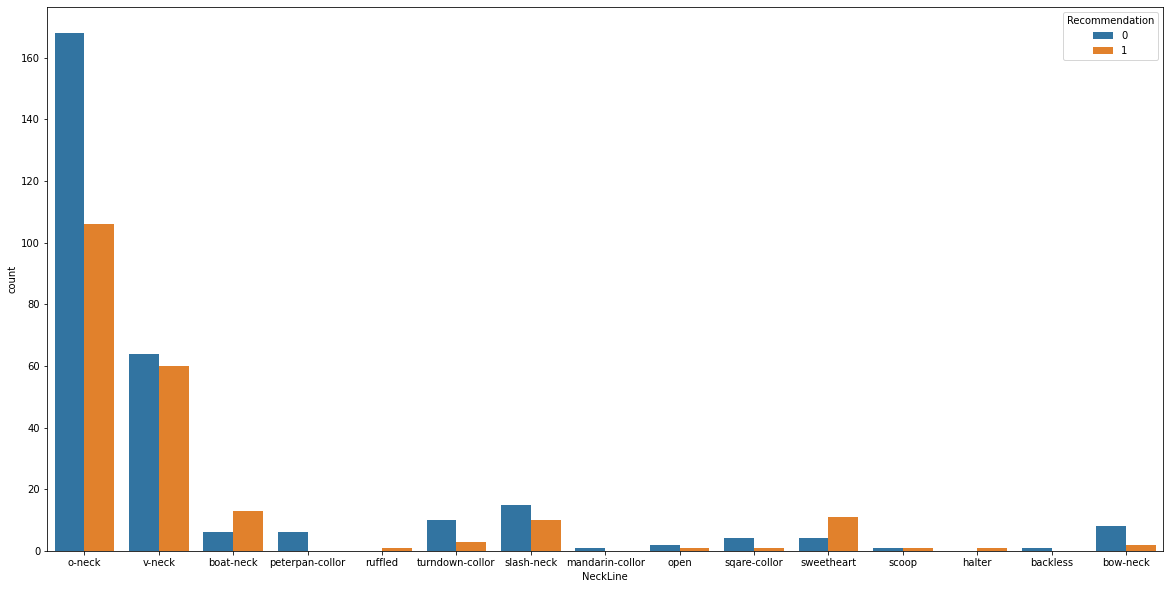

In [ ]:
plt.figure(figsize=(20,10))
counts=sns.countplot(x='NeckLine',data=attribute_data,hue='Recommendation')

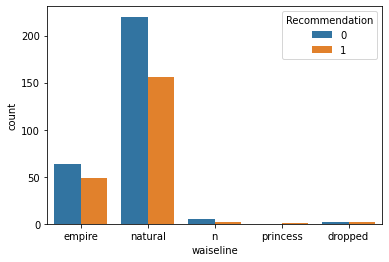

In [ ]:
counts=sns.countplot(x='waiseline',data=attribute_data,hue='Recommendation')

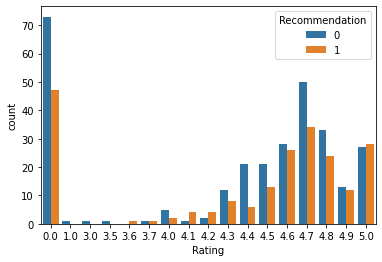

In [ ]:
counts=sns.countplot(x='Rating',data=attribute_data,hue='Recommendation')

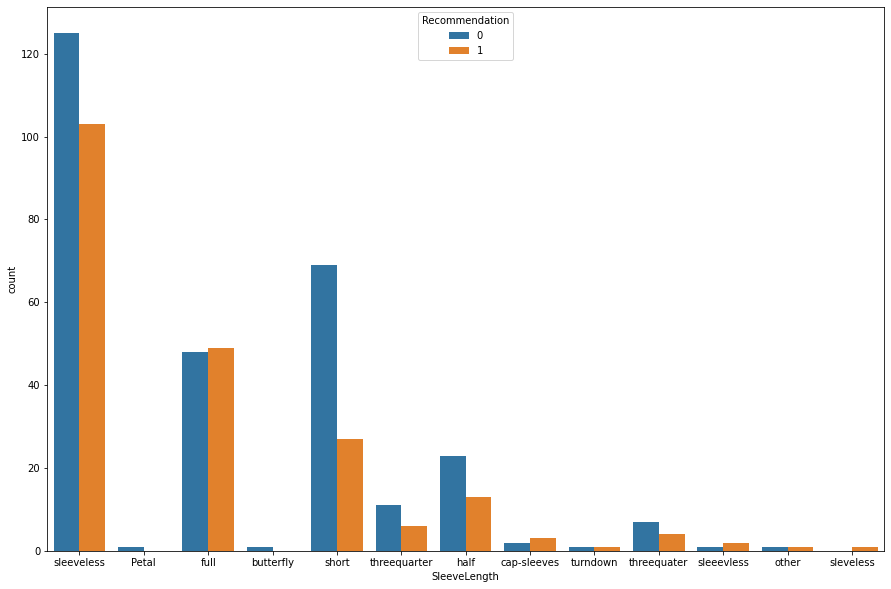

In [ ]:
plt.figure(figsize=(15,10))
counts=sns.countplot(x='SleeveLength',data=attribute_data,hue='Recommendation')

**Feature Engineering**

In [ ]:
data1=attribute_data.copy()

data1=pd.get_dummies(data1, prefix=['Style', 'Price', 'PatternType', 'Size', 'Season', 'NeckLine',
                                    'SleeveLength', 'waiseline', 'Material'])

In [ ]:
data2=attribute_data.copy()
popStyles=['cute','bohemian','flare','party','sexy','brief','vintage','novelty']
data2.loc[data2['Style'].isin(popStyles),'updStyle']= 1
data2.loc[~data2['Style'].isin(popStyles),'updStyle']= 0

data2.loc[data2['Price']=='low','updPrice']= 1
data2.loc[data2['Price']=='average','updPrice']= 2
data2.loc[data2['Price'].isin(['high','very-high']),'updPrice']= 3

data2.loc[data2['Season']=='spring','updSeason']= 1
data2.loc[data2['Season']!='spring','updSeason']= 0

data2.loc[data2['NeckLine'].isin(['v-neck','boat-neck','sweetheart','halter', 'open','slash-neck']),'updNeckLine']= 1
data2.loc[~data2['NeckLine'].isin(['v-neck','boat-neck','sweetheart','halter', 'open','slash-neck']),'updNeckLine']= 0

data2.loc[data2['SleeveLength'].isin(['full','short','threequarter']),'updSleeveLength']= 1
data2.loc[~data2['SleeveLength'].isin(['full','short','threequarter']),'updSleeveLength']= 0
data2=data2.drop(['Price','Season','Style','NeckLine','SleeveLength','Size'],axis=1)
data2=pd.get_dummies(data2,['PatternType','waiseline', 'Material'])

In [ ]:
data2.columns

Index(['Rating', 'Recommendation', 'updStyle', 'updPrice', 'updSeason',
       'updNeckLine', 'updSleeveLength', 'PatternType_animal',
       'PatternType_character', 'PatternType_dot', 'PatternType_floral',
       'PatternType_geometric', 'PatternType_leopard', 'PatternType_patchwork',
       'PatternType_plaid', 'PatternType_print', 'PatternType_solid',
       'PatternType_splice', 'PatternType_striped', 'waiseline_dropped',
       'waiseline_empire', 'waiseline_n', 'waiseline_natural',
       'waiseline_princess', 'Material_acrylic', 'Material_cashmere',
       'Material_chiffon', 'Material_cotton', 'Material_knitting',
       'Material_lace', 'Material_linen', 'Material_lycra',
       'Material_microfiber', 'Material_milksilk', 'Material_mix',
       'Material_modal', 'Material_nylon', 'Material_other',
       'Material_polyster', 'Material_rayon', 'Material_silk',
       'Material_spandex', 'Material_viscos', 'Material_wool'],
      dtype='object')

In [ ]:
data=attribute_data.copy()
popStyles=['cute','bohemian','flare','party','sexy','brief','vintage','novelty']
data.loc[data['Style'].isin(popStyles),'updStyle']= 1
data.loc[~data['Style'].isin(popStyles),'updStyle']= 0

data.loc[data['Price']=='low','updPrice']= 1
data.loc[data['Price']=='average','updPrice']= 2
data.loc[data['Price'].isin(['high','very-high']),'updPrice']= 3

data.loc[data['Season']=='spring','updSeason']= 1
data.loc[data['Season']!='spring','updSeason']= 0

data.loc[data['NeckLine'].isin(['v-neck','boat-neck','sweetheart','halter', 'open','slash-neck']),'updNeckLine']= 1
data.loc[~data['NeckLine'].isin(['v-neck','boat-neck','sweetheart','halter', 'open','slash-neck']),'updNeckLine']= 0

data.loc[data['SleeveLength'].isin(['full','short','threequarter']),'updSleeveLength']= 1
data.loc[~data['SleeveLength'].isin(['full','short','threequarter']),'updSleeveLength']= 0
data=data.drop(['Price','Season','Style','NeckLine','SleeveLength'],axis=1)



In [ ]:
data.corr()

,Rating,Recommendation,updStyle,updPrice,updSeason,updNeckLine,updSleeveLength
Rating,1.000000,0.040847,-0.029194,-0.097399,-0.039638,-0.096659,-0.066357
Recommendation,0.040847,1.000000,0.108762,0.056819,0.215066,0.146222,-0.050903
updStyle,-0.029194,0.108762,1.000000,0.144446,0.048610,0.106428,-0.110059
updPrice,-0.097399,0.056819,0.144446,1.000000,0.059522,0.181070,-0.030699
updSeason,-0.039638,0.215066,0.048610,0.059522,1.000000,0.063400,-0.057051
updNeckLine,-0.096659,0.146222,0.106428,0.181070,0.063400,1.000000,-0.079894
updSleeveLength,-0.066357,-0.050903,-0.110059,-0.030699,-0.057051,-0.079894,1.000000


In [ ]:
data.columns

Index(['PatternType', 'Size', 'waiseline', 'Material', 'Rating',
       'Recommendation', 'updStyle', 'updPrice', 'updSeason', 'updNeckLine',
       'updSleeveLength'],
      dtype='object')

In [ ]:
data=pd.get_dummies(data,['PatternType','Size','waiseline','Material'])

**Model Training**

In [ ]:
y=data['Recommendation']
x=data.copy()
x=x.drop(['Recommendation'],axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,test_size=0.3, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x_train, y_train)
model.predict(x_test)
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.65      0.82      0.72        87
           1       0.61      0.40      0.48        63

    accuracy                           0.64       150
   macro avg       0.63      0.61      0.60       150
weighted avg       0.63      0.64      0.62       150



In [ ]:
print(classification_report(y_train, model.predict(x_train)))

              precision    recall  f1-score   support

           0       0.66      0.84      0.74       203
           1       0.64      0.39      0.48       147

    accuracy                           0.65       350
   macro avg       0.65      0.62      0.61       350
weighted avg       0.65      0.65      0.63       350



In [ ]:
from sklearn.ensemble import RandomForestClassifier
 
# create the model with 500 trees
model = RandomForestClassifier(n_estimators=500,
                               bootstrap = True,
                               max_features = 'log2')
# Fit on training data
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
preds_train = model.predict(x_train)
print(classification_report(y_train,preds_train))
print('\n')
print(confusion_matrix(y_train,preds_train))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       203
           1       0.98      0.99      0.99       147

    accuracy                           0.99       350
   macro avg       0.99      0.99      0.99       350
weighted avg       0.99      0.99      0.99       350



[[200   3]
 [  1 146]]


In [ ]:
preds_test = model.predict(x_test)
print(classification_report(y_test,preds_test))
print('\n')
print(confusion_matrix(y_test,preds_test))

              precision    recall  f1-score   support

           0       0.63      0.57      0.60        87
           1       0.48      0.54      0.51        63

    accuracy                           0.56       150
   macro avg       0.56      0.56      0.55       150
weighted avg       0.57      0.56      0.56       150



[[50 37]
 [29 34]]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(n_estimators=600,learning_rate = 0.01)
model_ada.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.01,
                   n_estimators=600, random_state=None)

In [ ]:
preds_train = model_ada.predict(x_train)
print(classification_report(y_train,preds_train))
print('\n')
print(confusion_matrix(y_train,preds_train))

              precision    recall  f1-score   support

           0       0.65      0.85      0.73       203
           1       0.63      0.36      0.46       147

    accuracy                           0.64       350
   macro avg       0.64      0.60      0.60       350
weighted avg       0.64      0.64      0.62       350



[[172  31]
 [ 94  53]]


In [ ]:
preds_test = model_ada.predict(x_test)
print(classification_report(y_test,preds_test))
print('\n')
print(confusion_matrix(y_test,preds_test))

              precision    recall  f1-score   support

           0       0.64      0.83      0.72        87
           1       0.59      0.35      0.44        63

    accuracy                           0.63       150
   macro avg       0.62      0.59      0.58       150
weighted avg       0.62      0.63      0.60       150



[[72 15]
 [41 22]]


In [ ]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model_ada.feature_importances_}).\
                   sort_values('importance', ascending = False)

fi.head(20)

                

,feature,importance
3,updSeason,0.235000
0,Rating,0.146667
4,updNeckLine,0.116667
43,Material_rayon,0.111667
2,updPrice,0.078333
25,waiseline_n,0.068333
22,Size_free,0.063333
45,Material_spandex,0.056667
6,PatternType_animal,0.055000
15,PatternType_solid,0.031667


In [ ]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                   sort_values('importance', ascending = False)

fi.head(20)

                

,feature,importance
0,Rating,0.208591
2,updPrice,0.074912
3,updSeason,0.058809
5,updSleeveLength,0.058626
4,updNeckLine,0.056936
1,updStyle,0.052797
31,Material_cotton,0.042340
42,Material_polyster,0.037822
15,PatternType_solid,0.037811
22,Size_free,0.036207


## XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
my_model =  XGBClassifier(learning_rate= 0.05, n_estimators= 1000)
x_test = x_test[x_train.columns]
my_model.fit(x_train, y_train)

preds = my_model.predict(x_test)

In [ ]:
Pred_train = my_model.predict(x_train)

print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.63      0.64      0.64        87
           1       0.49      0.48      0.48        63

    accuracy                           0.57       150
   macro avg       0.56      0.56      0.56       150
weighted avg       0.57      0.57      0.57       150



In [ ]:
x_train.dtypes

Rating                   float64
updStyle                 float64
updPrice                 float64
updSeason                float64
updNeckLine              float64
updSleeveLength          float64
PatternType_animal         uint8
PatternType_character      uint8
PatternType_dot            uint8
PatternType_floral         uint8
PatternType_geometric      uint8
PatternType_leopard        uint8
PatternType_patchwork      uint8
PatternType_plaid          uint8
PatternType_print          uint8
PatternType_solid          uint8
PatternType_splice         uint8
PatternType_striped        uint8
Size_L                     uint8
Size_M                     uint8
Size_S                     uint8
Size_XL                    uint8
Size_free                  uint8
waiseline_dropped          uint8
waiseline_empire           uint8
waiseline_n                uint8
waiseline_natural          uint8
waiseline_princess         uint8
Material_acrylic           uint8
Material_cashmere          uint8
Material_c

No handles with labels found to put in legend.


[0.03830945 0.06381713 0.0360069  0.08864065 0.06500152 0.05583025
 0.03946006 0.         0.03469001 0.         0.         0.
 0.00773523 0.         0.05934654 0.04098582 0.         0.00769435
 0.01462463 0.0515     0.01181343 0.015385   0.04383953 0.
 0.03278581 0.03074276 0.04652557 0.         0.         0.
 0.03843689 0.04045647 0.         0.         0.         0.
 0.         0.         0.00654931 0.         0.02060017 0.
 0.04591931 0.01611537 0.04718791 0.         0.         0.        ]


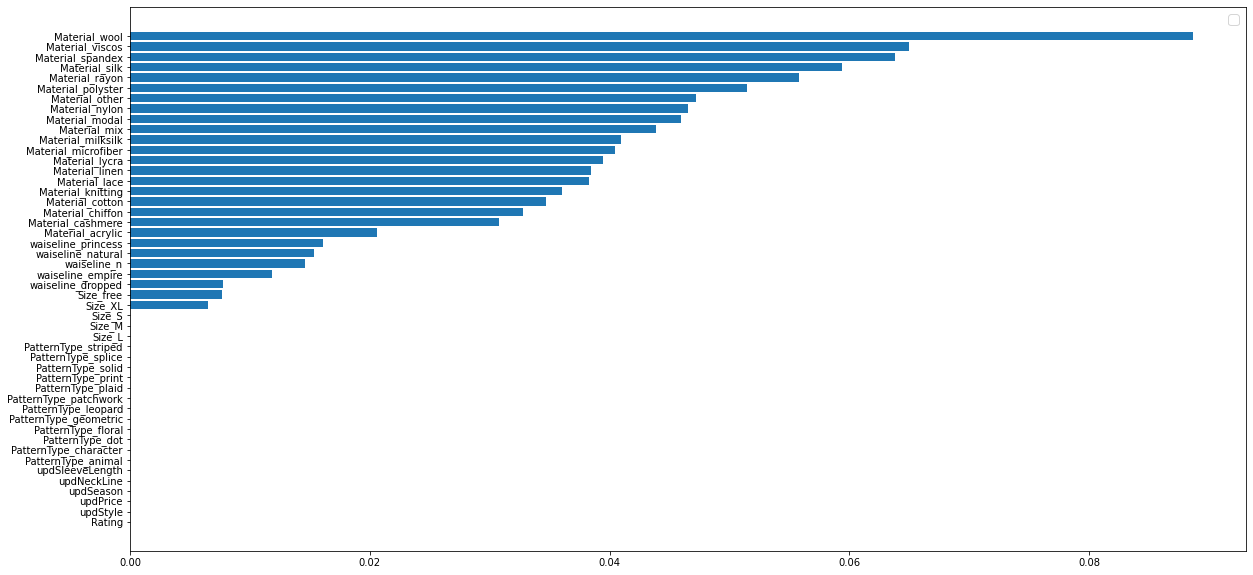

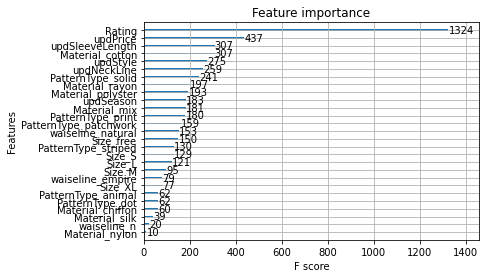

In [ ]:
from matplotlib import pyplot
from xgboost import plot_importance

td_feature_names = x_train.columns

# feature importance
print(my_model.feature_importances_)
# plot
f, ax = pyplot.subplots(figsize=(20,10))
pyplot.barh(td_feature_names, np.sort(my_model.feature_importances_))
ax.legend(fontsize = 14)

plot_importance(my_model)
pyplot.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
preds_train = my_model.predict(x_test)
print(classification_report(y_test,preds_train))
print('\n')
print(confusion_matrix(y_test,preds_train))

              precision    recall  f1-score   support

           0       0.63      0.64      0.64        87
           1       0.49      0.48      0.48        63

    accuracy                           0.57       150
   macro avg       0.56      0.56      0.56       150
weighted avg       0.57      0.57      0.57       150



[[56 31]
 [33 30]]


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score

print(f1_score(preds_train, y_test, average='macro'))
print("Precision = {}".format(precision_score(y_test, preds_train, average='macro')))
print("Recall = {}".format(recall_score(y_test, preds_train, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, preds_train)))

0.5601173020527859
Precision = 0.5605083809172959
Recall = 0.5599343185550082
Accuracy = 0.5733333333333334


In [ ]:
unwanted = ['PatternType_character','PatternType_floral', 'PatternType_geometric','PatternType_leopard', 'PatternType_plaid',
       'PatternType_splice','waiseline_dropped','waiseline_princess']

x_2=data2.copy()
x_2=x_2.drop(['Recommendation'],axis=1)

for i in unwanted:
  x_2.drop(i,axis=1)     

from sklearn.model_selection import train_test_split
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2,y,stratify=y,test_size=0.2,random_state =0)   

In [ ]:
my_model_2 =  XGBClassifier(learning_rate= 0.05, n_estimators= 1000)
my_model_2.fit(x_train_2, y_train_2)

preds = my_model_2.predict(x_test_2)

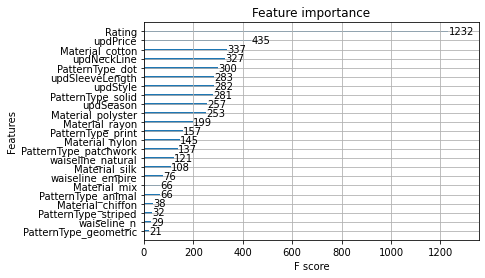

In [ ]:
td_feature_names = x_train_2.columns

plot_importance(my_model_2)
pyplot.show()

In [ ]:
preds_train = my_model_2.predict(x_test_2)
print(classification_report(y_test_2,preds_train))
print('\n')
print(confusion_matrix(y_test_2,preds_train))

              precision    recall  f1-score   support

           0       0.61      0.64      0.62        58
           1       0.46      0.43      0.44        42

    accuracy                           0.55       100
   macro avg       0.53      0.53      0.53       100
weighted avg       0.55      0.55      0.55       100



[[37 21]
 [24 18]]


In [ ]:
print(f1_score(preds_train, y_test_2, average='macro'))
print("Precision = {}".format(precision_score(y_test_2, preds_train, average='macro')))
print("Recall = {}".format(recall_score(y_test_2, preds_train, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test_2, preds_train)))

0.5331465919701214
Precision = 0.534047919293821
Recall = 0.5332512315270936
Accuracy = 0.55


ROC AUC=0.53325


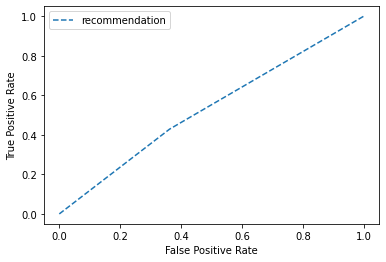

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

roc_auc = roc_auc_score(y_test_2, preds_train)
print('ROC AUC=%.5f' % (roc_auc))

roc_fpr, roc_tpr , _ = roc_curve(y_test_2, preds_train)

pyplot.plot(roc_fpr, roc_tpr, linestyle='--', label='recommendation')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Categorical Encodings

In [ ]:
training_data = pd.read_csv("/content/Attribute_DataSet.csv")
training_data.head()

,Dress_ID,Style,Price,PatternType,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Rating,Recommendation
0,1006032852,Sexy,Low,animal,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,4.6,1
1,1212192089,Casual,Low,animal,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,0.0,0
2,1190380701,vintage,High,print,L,Automn,o-neck,full,natural,polyster,NaN,NaN,0.0,0
3,966005983,Brief,Average,print,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,4.6,1
4,876339541,cute,Low,dot,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,4.5,0


In [ ]:
!pip install category_encoders

In [ ]:
import category_encoders as ce
cat_features = ['Style', 'Price', 'PatternType', 'Size', 'Season',
       'NeckLine', 'SleeveLength', 'waiseline', 'Material', 'FabricType',
       'Decoration', 'Rating']
count_enc = ce.CountEncoder()
count_encoded = count_enc.fit_transform(training_data[cat_features])

data = x_2.join(count_encoded.add_suffix("_count"))

# for i in cat_features:
#   data = data.drop(i,axis=1) 

# data = data.drop('Recommendation',axis=1)  

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(data, training_data.Recommendation, random_state = 1)

In [ ]:
data.dtypes

Rating                   float64
updStyle                 float64
updPrice                 float64
updSeason                float64
updNeckLine              float64
updSleeveLength          float64
PatternType_animal         uint8
PatternType_character      uint8
PatternType_dot            uint8
PatternType_floral         uint8
PatternType_geometric      uint8
PatternType_leopard        uint8
PatternType_patchwork      uint8
PatternType_plaid          uint8
PatternType_print          uint8
PatternType_solid          uint8
PatternType_splice         uint8
PatternType_striped        uint8
waiseline_dropped          uint8
waiseline_empire           uint8
waiseline_n                uint8
waiseline_natural          uint8
waiseline_princess         uint8
Material_acrylic           uint8
Material_cashmere          uint8
Material_chiffon           uint8
Material_cotton            uint8
Material_knitting          uint8
Material_lace              uint8
Material_linen             uint8
Material_l

In [ ]:
xgb_model_1a =  XGBClassifier(n_estimators=1500,learning_rate=0.05) 

xgb_model_1a.fit(x_train_3,y_train_3)
predictions_1a = xgb_model_1a.predict(x_test_3)

In [ ]:
x_test_3.columns

Index(['Rating', 'updStyle', 'updPrice', 'updSeason', 'updNeckLine',
       'updSleeveLength', 'PatternType_animal', 'PatternType_character',
       'PatternType_dot', 'PatternType_floral', 'PatternType_geometric',
       'PatternType_leopard', 'PatternType_patchwork', 'PatternType_plaid',
       'PatternType_print', 'PatternType_solid', 'PatternType_splice',
       'PatternType_striped', 'waiseline_dropped', 'waiseline_empire',
       'waiseline_n', 'waiseline_natural', 'waiseline_princess',
       'Material_acrylic', 'Material_cashmere', 'Material_chiffon',
       'Material_cotton', 'Material_knitting', 'Material_lace',
       'Material_linen', 'Material_lycra', 'Material_microfiber',
       'Material_milksilk', 'Material_mix', 'Material_modal', 'Material_nylon',
       'Material_other', 'Material_polyster', 'Material_rayon',
       'Material_silk', 'Material_spandex', 'Material_viscos', 'Material_wool',
       'Style_count', 'Price_count', 'PatternType_count', 'Size_count',
       '

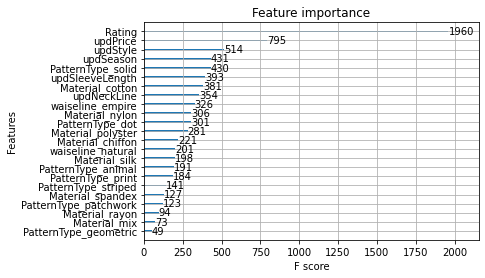

In [ ]:
td_feature_names = x_train_3.columns

plot_importance(xgb_model_1a)
pyplot.show()

In [ ]:
print(f1_score(predictions_1a, y_test_3, average='macro'))
print("Precision = {}".format(precision_score(y_test_3, predictions_1a, average='macro')))
print("Recall = {}".format(recall_score(y_test_3, predictions_1a, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test_3, predictions_1a)))

0.37617473588696615
Precision = 0.3756551362683438
Recall = 0.3778950077200206
Accuracy = 0.384


# Experiment

# New Section

## model

In [ ]:
attribute_data.dtypes

Style              object
Price              object
PatternType        object
Size               object
Season             object
NeckLine           object
SleeveLength       object
waiseline          object
Material           object
Rating            float64
Recommendation      int64
dtype: object

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

features = ['Style', 'Price', 'PatternType', 'Size', 'Season',
       'NeckLine', 'SleeveLength', 'waiseline', 'Material', 'FabricType',
       'Decoration', 'Rating']

enc = LabelEncoder()

for i in features:
  attribute_data['Recommendation'] = enc.fit_transform(attribute_data['Recommendation'])
X_train, X_valid, y_train, y_valid = train_test_split(attribute_data[features], attribute_data.Recommendation, random_state = 0)

X = attribute_data[features]
y = attribute_data.Recommendation

KeyError: ignored